In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import json

# Load your dataset
df = pd.read_csv('user_transactions_with_country(Final).csv')

# Drop rows with missing values
df = df.dropna()
print(f"Number of rows after dropping missing values: {len(df)}")

# Exclude 'UNKNOWN' entries if needed
df = df[df['country'] != 'Unknown']
print(f"Number of rows after excluding 'UNKNOWN' entries: {len(df)}")

# Define features and target variable
X = df[['amount', 'age', 'store', 'country']]
y = df['fraud']  # Target variable

# Apply OneHotEncoding
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Drop='first' avoids dummy variable trap
X_encoded = encoder.fit_transform(X[['store', 'country']])

# Convert encoded features to DataFrame
encoded_feature_names = encoder.get_feature_names_out(['store', 'country'])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)

# Concatenate with other features
X_final = pd.concat([df[['amount', 'age']].reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

# Standardize the features for models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Number of rows after dropping missing values: 144001
Number of rows after excluding 'UNKNOWN' entries: 143978


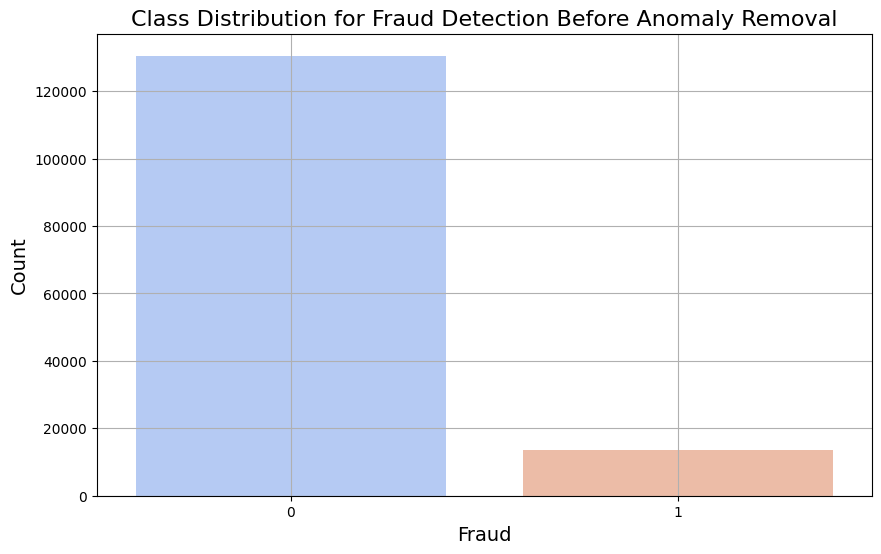

Class Counts Before Anomaly Removal:
fraud
0    130488
1     13490
Name: count, dtype: int64

Class Proportions (%) Before Anomaly Removal:
fraud
0    90.630513
1     9.369487
Name: proportion, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Unbalanced Data Analysis: Class Distribution Before Anomaly Removal
plt.figure(figsize=(10, 6))
sns.countplot(x='fraud', data=df, hue='fraud', palette='coolwarm', legend=False)
plt.title('Class Distribution for Fraud Detection Before Anomaly Removal', fontsize=16)
plt.xlabel('Fraud', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)
plt.show()

# Calculate and print class proportions before anomaly removal
class_counts_before = df['fraud'].value_counts()
class_proportions_before = df['fraud'].value_counts(normalize=True) * 100

print("Class Counts Before Anomaly Removal:")
print(class_counts_before)
print("\nClass Proportions (%) Before Anomaly Removal:")
print(class_proportions_before)

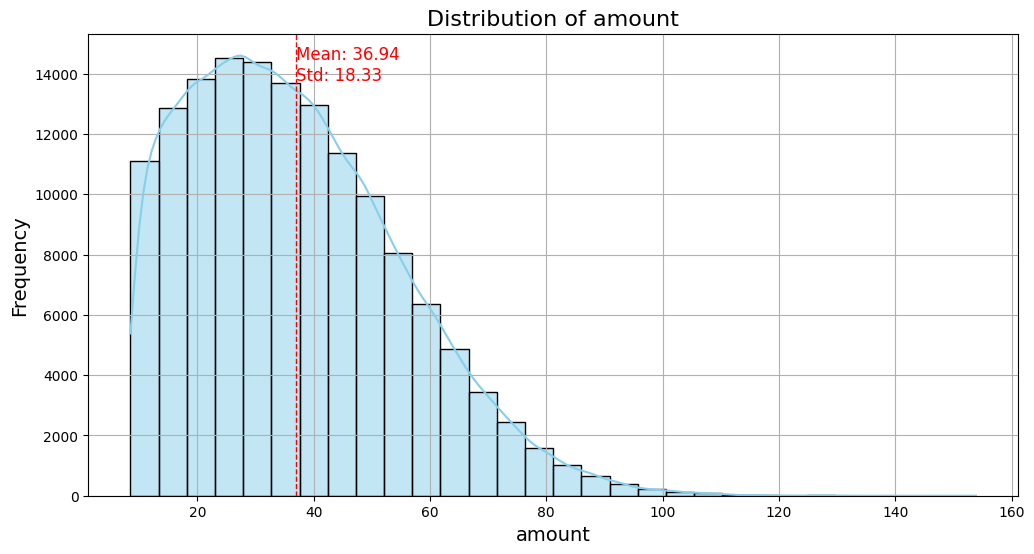

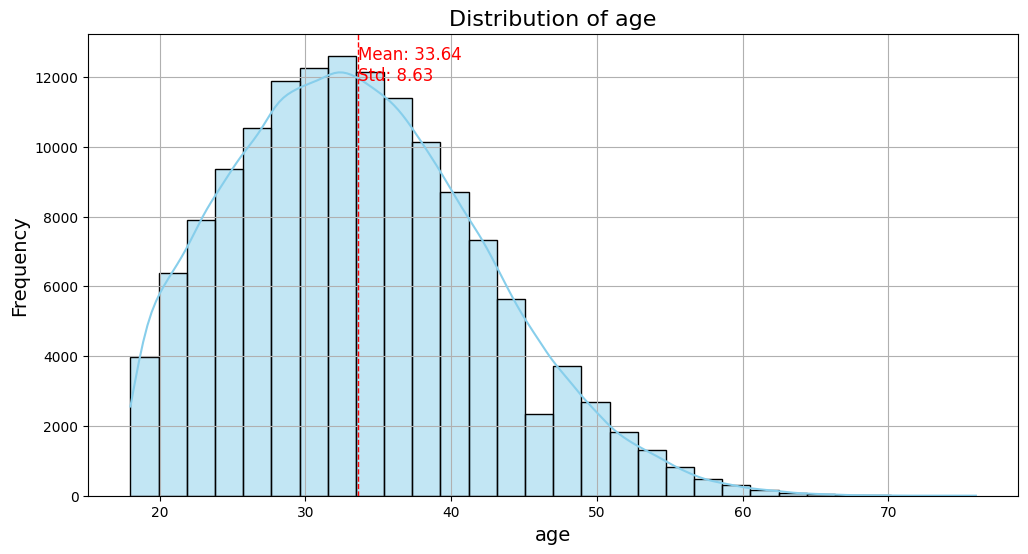

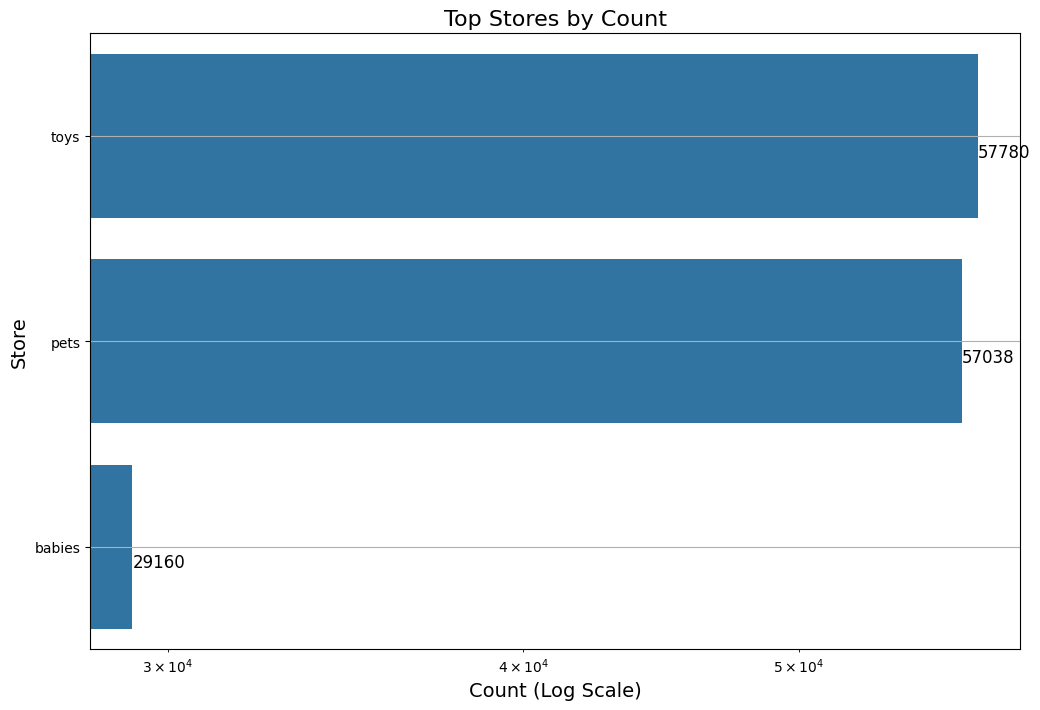

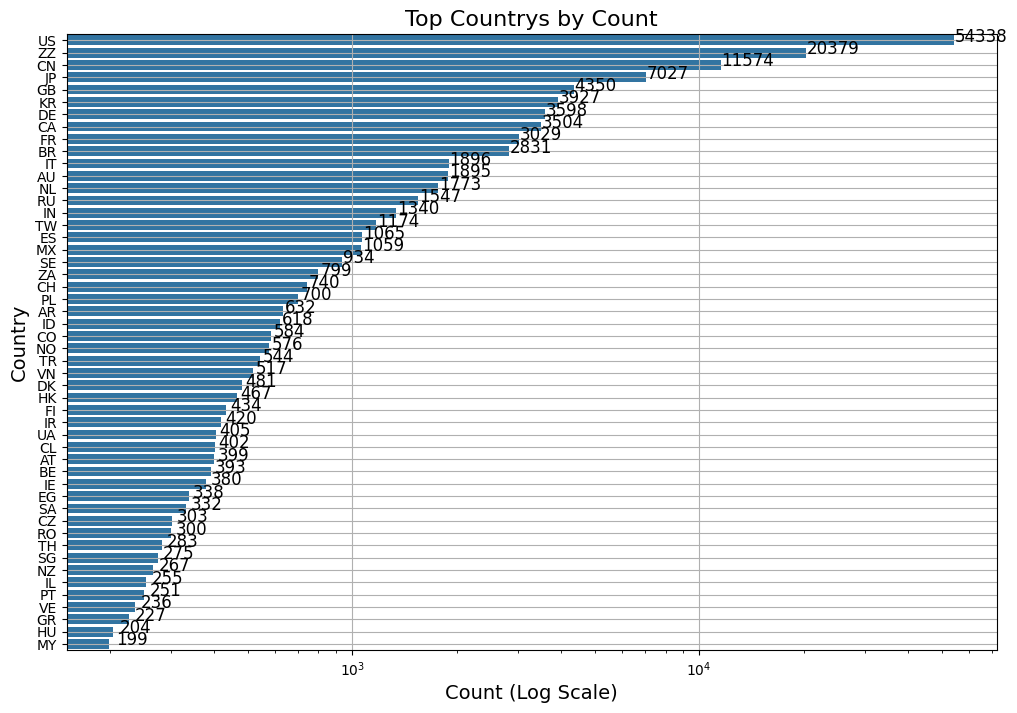

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Univariate Analysis of Numerical Features
numerical_features = ['amount', 'age']

for feature in numerical_features:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True)

    # Add mean and standard deviation to the plot
    mean = df[feature].mean()
    std = df[feature].std()
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=1)
    plt.text(mean, plt.ylim()[1]*0.9, f'Mean: {mean:.2f}\nStd: {std:.2f}', color='red', fontsize=12)

    plt.show()

# Univariate Analysis of Categorical Features
categorical_features = ['store', 'country']

# Univariate Analysis of Categorical Features with Logarithmic Scale and Top N Countries
top_n = 50  # Display only the top 20 countries for clarity

for feature in categorical_features:
    plt.figure(figsize=(12, 8))

    # Get the top N categories
    top_categories = df[feature].value_counts().head(top_n)

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame({
        feature: top_categories.index,
        'Count': top_categories.values
    })

    # Plot using a horizontal bar plot with a log scale
    ax = sns.barplot(x='Count', y=feature, data=plot_df)
    plt.title(f'Top {feature.capitalize()}s by Count', fontsize=16)
    plt.xlabel('Count (Log Scale)', fontsize=14)
    plt.ylabel(feature.capitalize(), fontsize=14)
    plt.xscale('log')  # Apply logarithmic scale for clarity
    plt.grid(True)

    # Add count annotations
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.0f}', (p.get_width() + 10, p.get_y() + 0.5), fontsize=12)

    plt.show()


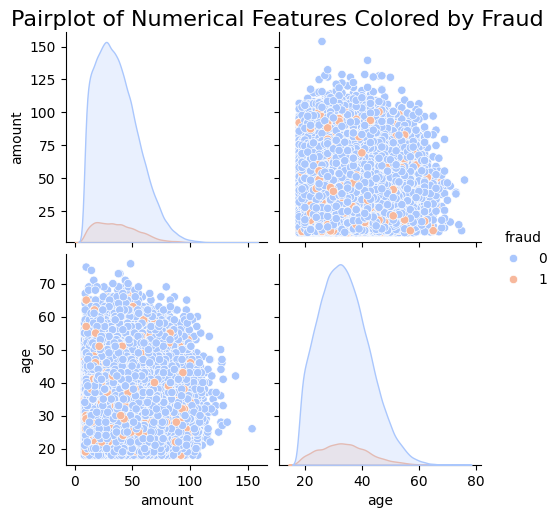

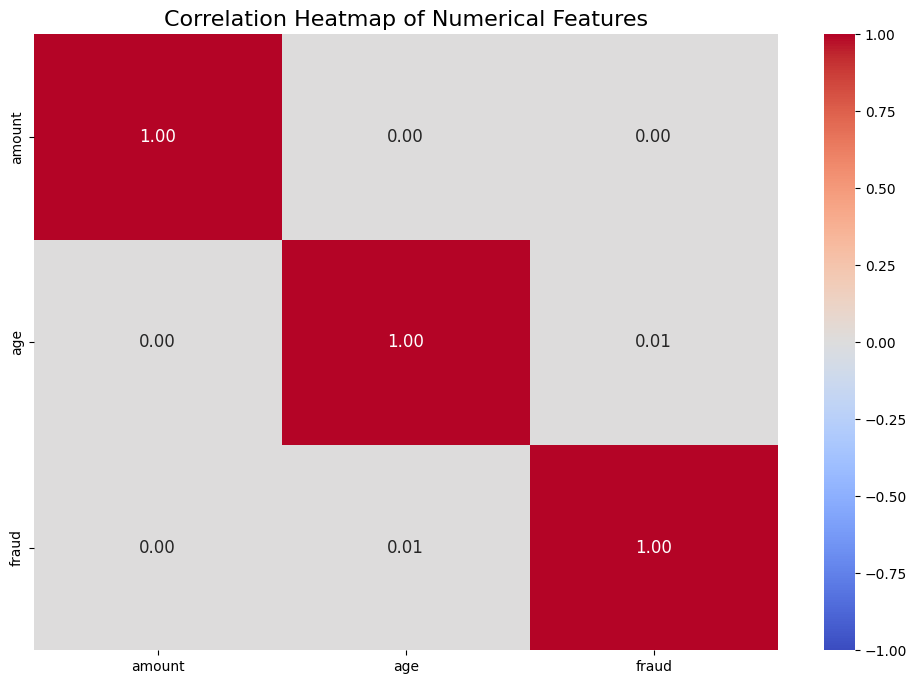

In [ ]:
import plotly.express as px
# Multivariate Analysis: Pairplot
sns.pairplot(df[['amount', 'age', 'fraud']], hue='fraud', diag_kind='kde', palette='coolwarm')
plt.suptitle('Pairplot of Numerical Features Colored by Fraud', y=1.02, fontsize=16)
plt.show()

# Multivariate Analysis: Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[['amount', 'age', 'fraud']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 12}, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

# Interactive Boxplot using Plotly
fig = px.box(df, x='country', y='amount', title='Boxplot of Amount by Country')
fig.update_xaxes(title='Country', tickangle=90)  # Rotate x-axis labels
fig.update_yaxes(title='Amount')
fig.show()

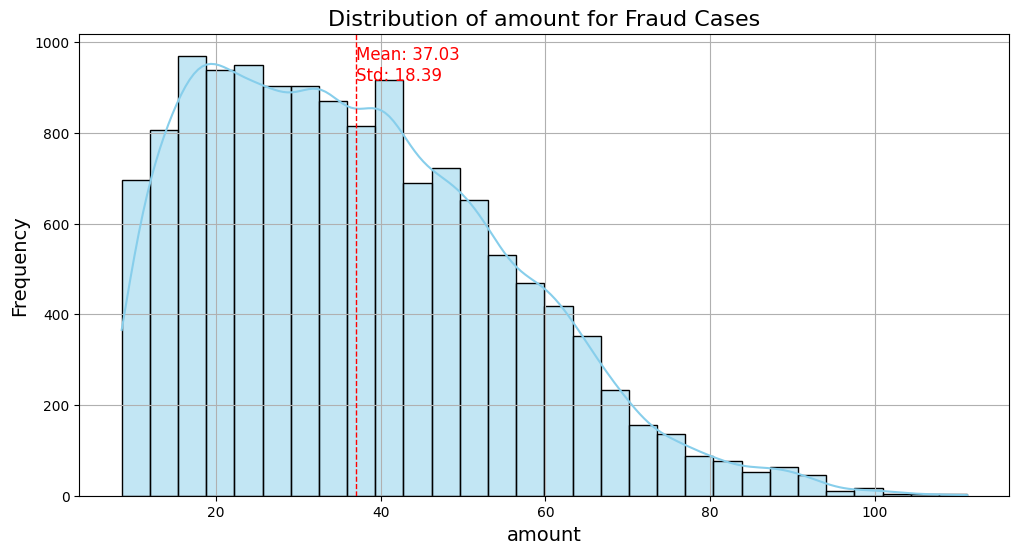

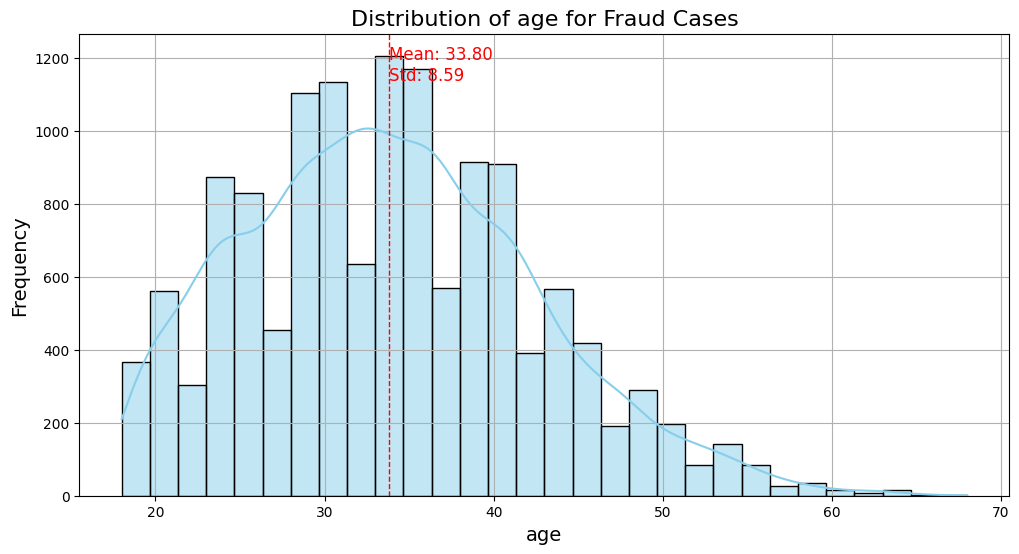

In [ ]:
fraud_df = df[df['fraud'] == 1]
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate Analysis of Numerical Features for fraud cases
numerical_features = ['amount', 'age']

for feature in numerical_features:
    plt.figure(figsize=(12, 6))
    sns.histplot(fraud_df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature} for Fraud Cases', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True)

    # Add mean and standard deviation to the plot
    mean = fraud_df[feature].mean()
    std = fraud_df[feature].std()
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=1)
    plt.text(mean, plt.ylim()[1]*0.9, f'Mean: {mean:.2f}\nStd: {std:.2f}', color='red', fontsize=12)

    plt.show()


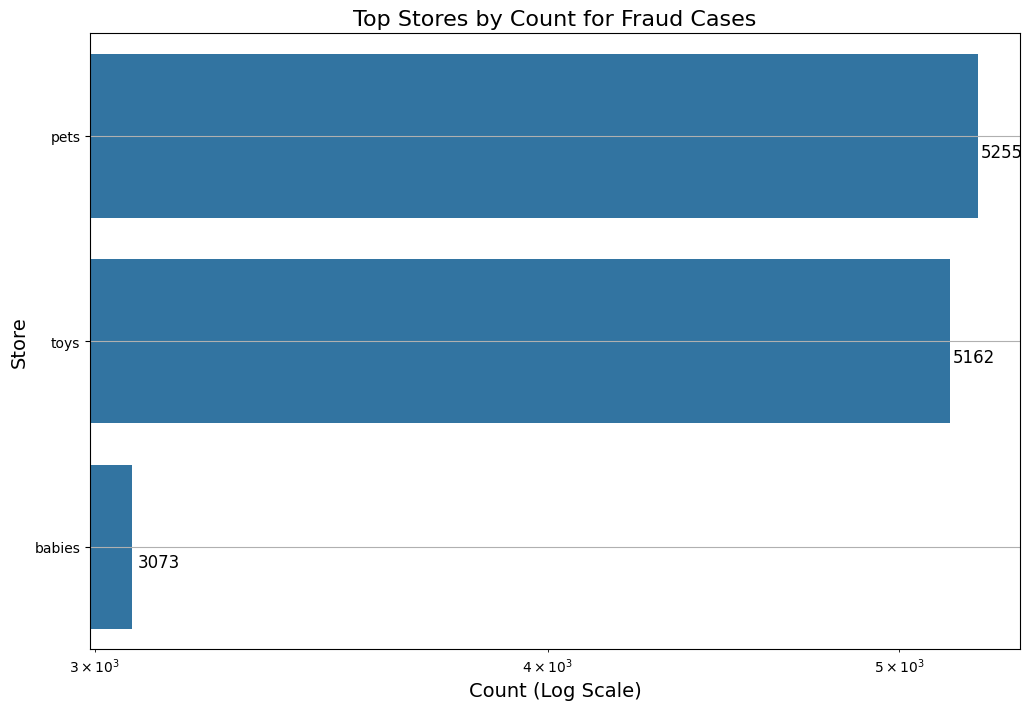

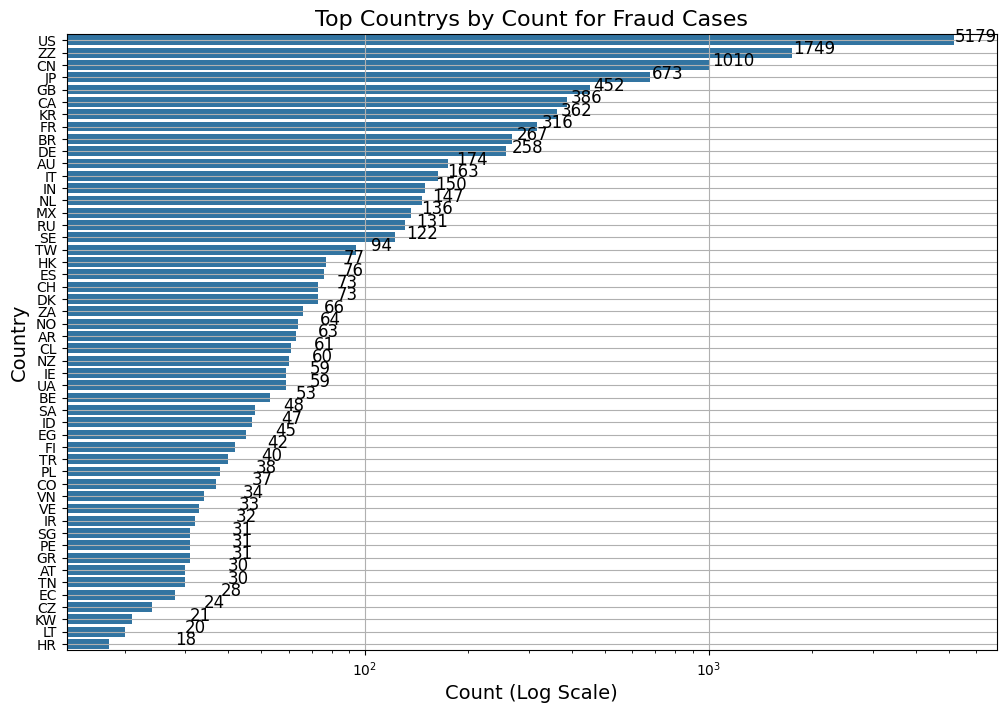

In [ ]:
fraud_df = df[df['fraud'] == 1]
categorical_features = ['store', 'country']
top_n = 50  # Display only the top N categories for clarity

for feature in categorical_features:
    plt.figure(figsize=(12, 8))

    # Get the top N categories for fraud cases
    top_categories = fraud_df[feature].value_counts().head(top_n)

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame({
        feature: top_categories.index,
        'Count': top_categories.values
    })

    # Plot using a horizontal bar plot with a log scale
    ax = sns.barplot(x='Count', y=feature, data=plot_df)
    plt.title(f'Top {feature.capitalize()}s by Count for Fraud Cases', fontsize=16)
    plt.xlabel('Count (Log Scale)', fontsize=14)
    plt.ylabel(feature.capitalize(), fontsize=14)
    plt.xscale('log')  # Apply logarithmic scale for clarity
    plt.grid(True)

    # Add count annotations
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.0f}', (p.get_width() + 10, p.get_y() + 0.5), fontsize=12)

    plt.show()


In [ ]:
from sklearn.ensemble import IsolationForest
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Fit Isolation Forest on the training data
isolation_forest = IsolationForest(contamination=0.1, random_state=42)
isolation_forest.fit(X_train_scaled)

# Predict outliers/anomalies for train and test sets
anomalies_train = isolation_forest.predict(X_train_scaled)
anomalies_test = isolation_forest.predict(X_test_scaled)

# Count anomalies before removing them
num_anomalies_train = len(anomalies_train[anomalies_train == -1])
num_anomalies_test = len(anomalies_test[anomalies_test == -1])

print(f"Number of anomalies detected in the train set before removal: {num_anomalies_train}")
print(f"Number of anomalies detected in the test set before removal: {num_anomalies_test}")

# Remove anomalies in the train set
if -1 in anomalies_train:
    print("Anomalies detected in the train set. Removing anomalies...")
    X_train_no_anomalies = X_train_scaled[anomalies_train != -1]
    y_train_no_anomalies = y_train[anomalies_train != -1].reset_index(drop=True)
    print(f"Number of rows after removing anomalies in train set: {len(X_train_no_anomalies)}")
else:
    print("No anomalies detected in the train set.")
    X_train_no_anomalies = X_train_scaled
    y_train_no_anomalies = y_train

# Remove anomalies in the test set
if -1 in anomalies_test:
    print("Anomalies detected in the test set. Removing anomalies...")
    X_test_no_anomalies = X_test_scaled[anomalies_test != -1]
    y_test_no_anomalies = y_test[anomalies_test != -1].reset_index(drop=True)
    print(f"Number of rows after removing anomalies in test set: {len(X_test_no_anomalies)}")
else:
    print("No anomalies detected in the test set.")
    X_test_no_anomalies = X_test_scaled
    y_test_no_anomalies = y_test


Number of anomalies detected in the train set before removal: 10066
Number of anomalies detected in the test set before removal: 4352
Anomalies detected in the train set. Removing anomalies...
Number of rows after removing anomalies in train set: 90718
Anomalies detected in the test set. Removing anomalies...
Number of rows after removing anomalies in test set: 38842



SMOTE - Class Distribution after Resampling:
fraud
0    91302
1    91302
Name: count, dtype: int64

RandomUnderSampling - Class Distribution after Resampling:
fraud
0    9482
1    9482
Name: count, dtype: int64

ADASYN - Class Distribution after Resampling:
fraud
0    91302
1    91023
Name: count, dtype: int64


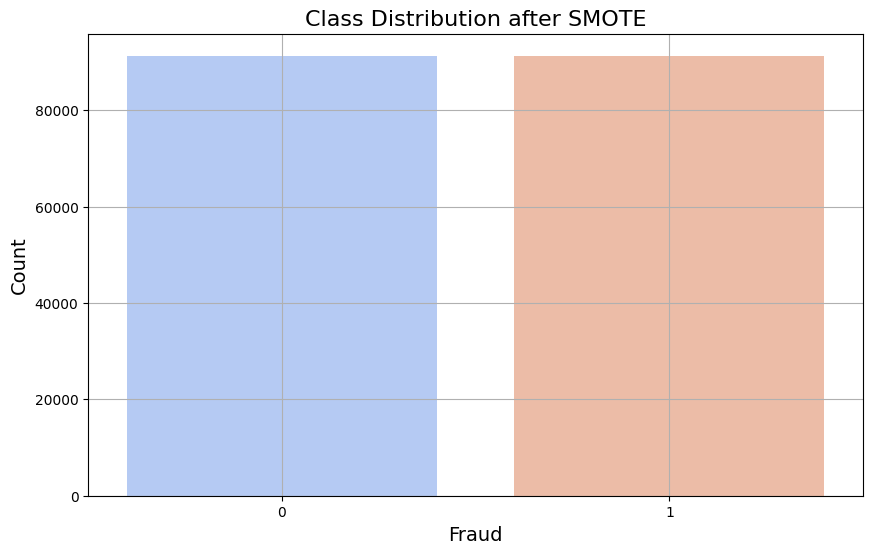

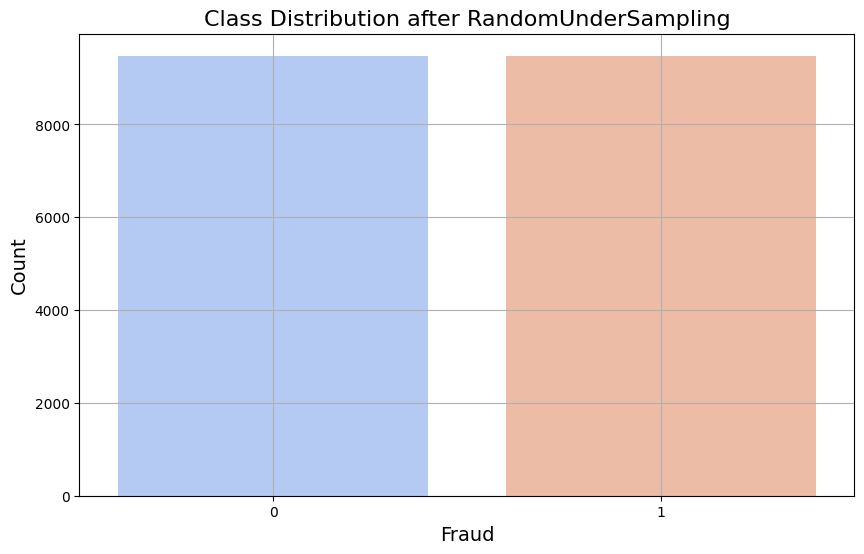

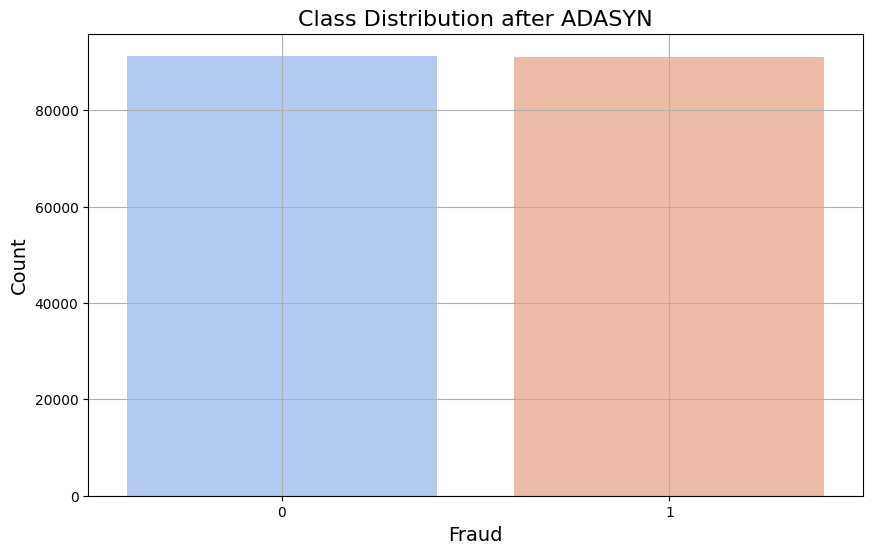

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define sampling techniques including the no resampling option
sampling_methods = {
    'SMOTE': SMOTE(random_state=42),
    'RandomUnderSampling': RandomUnderSampler(random_state=42),
    'ADASYN': ADASYN(random_state=42)  # Added ADASYN
}

# Dictionary to hold resampled data
resampled_data = {}

# Apply each sampling method or no resampling
for name, method in sampling_methods.items():
    if method is None:
        # No resampling
        X_resampled, y_resampled = X_train_scaled, y_train
    else:
        # Apply resampling
        X_resampled, y_resampled = method.fit_resample(X_train_scaled, y_train)

    resampled_data[name] = (X_resampled, y_resampled)
    print(f"\n{name} - Class Distribution after Resampling:")
    print(pd.Series(y_resampled).value_counts())

# Optional: Visualize the effects of resampling
def plot_class_distribution(y, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=y, hue=y, palette='coolwarm', legend=False)  # Added hue and legend=False
    plt.title(title, fontsize=16)
    plt.xlabel('Fraud', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.grid(True)
    plt.show()

for name, (X_resampled, y_resampled) in resampled_data.items():
    plot_class_distribution(y_resampled, f'Class Distribution after {name}')


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import ADASYN  # Import ADASYN

# Define classifiers with their respective parameter grids for tuning
classifiers = {
    'RandomForest': (RandomForestClassifier(random_state=42), {
        'n_estimators': [5, 10],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }),
    'GradientBoosting': (GradientBoostingClassifier(random_state=42), {
        'n_estimators': [5, 10],
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [3, 5, 7]
    }),
    'LogisticRegression': (LogisticRegression(random_state=42, max_iter=100), {
        'C': [0.001, 0.01, 0.1],
        'penalty': ['l2']
    }),
    'NaiveBayes': (GaussianNB(), {}),
    'DecisionTree': (DecisionTreeClassifier(random_state=42), {
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None]
    })
}

# Instantiate ADASYN resampler
adasyn = ADASYN(random_state=42)

# Apply ADASYN resampling
X_resampled, y_resampled = adasyn.fit_resample(X_train_no_anomalies, y_train_no_anomalies)

# Loop over classifiers and perform GridSearchCV
for model_name, (classifier, param_grid) in classifiers.items():
    print(f"\nTuning {model_name} on ADASYN resampled data...")

    # Define GridSearchCV with classifier, parameter grid, and scoring metric
    grid_search = GridSearchCV(classifier, param_grid, scoring='roc_auc', cv=3, n_jobs=-1)

    # Fit GridSearchCV on ADASYN resampled data
    grid_search.fit(X_resampled, y_resampled)

    # Print best parameters and best score
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best ROC-AUC Score: {grid_search.best_score_:.4f}")


Tuning RandomForest on ADASYN resampled data...
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}
Best ROC-AUC Score: 0.8531

Tuning GradientBoosting on ADASYN resampled data...
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 10}
Best ROC-AUC Score: 0.7356

Tuning LogisticRegression on ADASYN resampled data...
Best Parameters: {'C': 0.001, 'penalty': 'l2'}
Best ROC-AUC Score: 0.5388

Tuning NaiveBayes on ADASYN resampled data...
Best Parameters: {}
Best ROC-AUC Score: 0.5039

Tuning DecisionTree on ADASYN resampled data...
Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best ROC-AUC Score: 0.8840


In [ ]:
Evaluate the Best Model on Test Data


Evaluating RandomForest on Test Data...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names




Classification Report for RandomForest:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     39186
           1       0.09      1.00      0.17      4008

    accuracy                           0.09     43194
   macro avg       0.05      0.50      0.08     43194
weighted avg       0.01      0.09      0.02     43194

ROC-AUC Score: 0.5000

Evaluating GradientBoosting on Test Data...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning:

X has feature names, but GradientBoostingClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: U


Classification Report for GradientBoosting:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     39186
           1       0.09      1.00      0.17      4008

    accuracy                           0.09     43194
   macro avg       0.05      0.50      0.08     43194
weighted avg       0.01      0.09      0.02     43194

ROC-AUC Score: 0.5003

Evaluating LogisticRegression on Test Data...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarni


Classification Report for LogisticRegression:

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     39186
           1       0.00      0.00      0.00      4008

    accuracy                           0.91     43194
   macro avg       0.45      0.50      0.48     43194
weighted avg       0.82      0.91      0.86     43194

ROC-AUC Score: 0.4982

Evaluating NaiveBayes on Test Data...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning:

X has feature names, but GaussianNB was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning:

X h


Classification Report for NaiveBayes:

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     39186
           1       0.00      0.00      0.00      4008

    accuracy                           0.91     43194
   macro avg       0.45      0.50      0.48     43194
weighted avg       0.82      0.91      0.86     43194

ROC-AUC Score: 0.5000

Evaluating DecisionTree on Test Data...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserW


Classification Report for DecisionTree:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     39186
           1       0.09      1.00      0.17      4008

    accuracy                           0.09     43194
   macro avg       0.05      0.50      0.08     43194
weighted avg       0.01      0.09      0.02     43194

ROC-AUC Score: 0.5000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



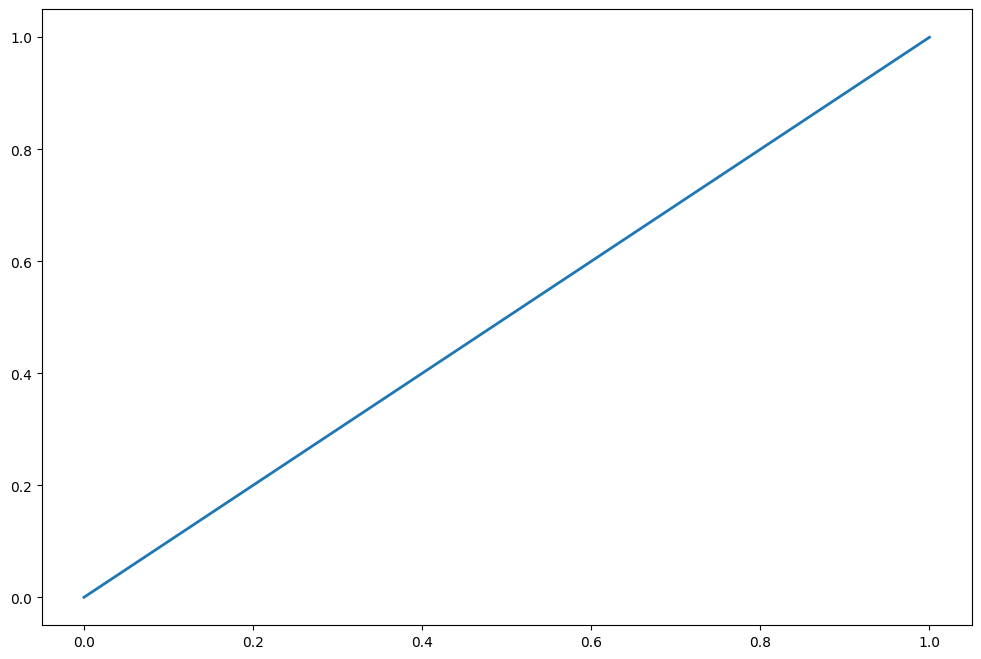

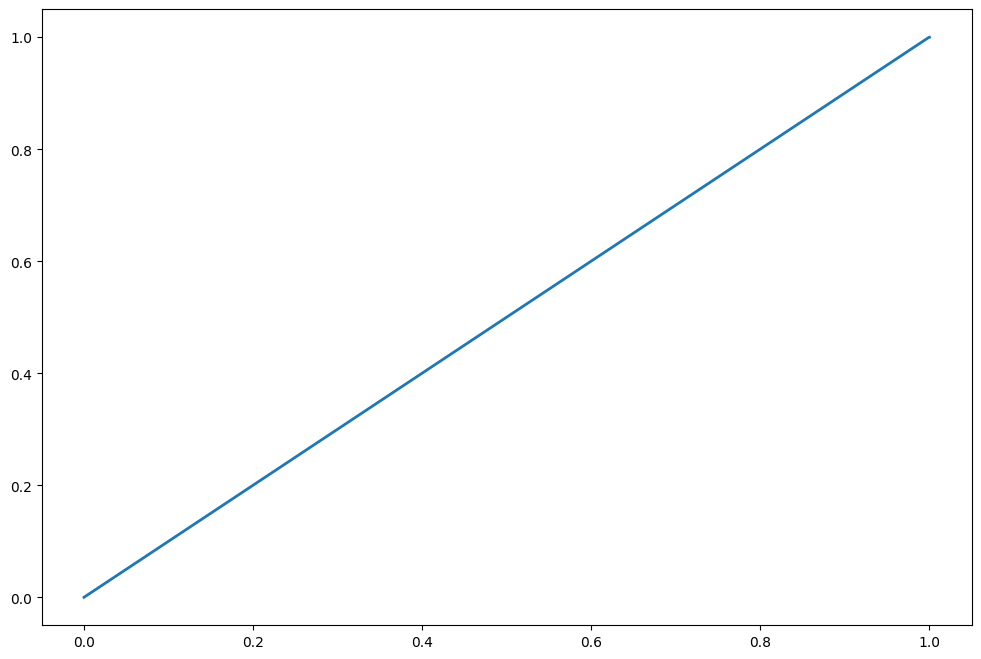

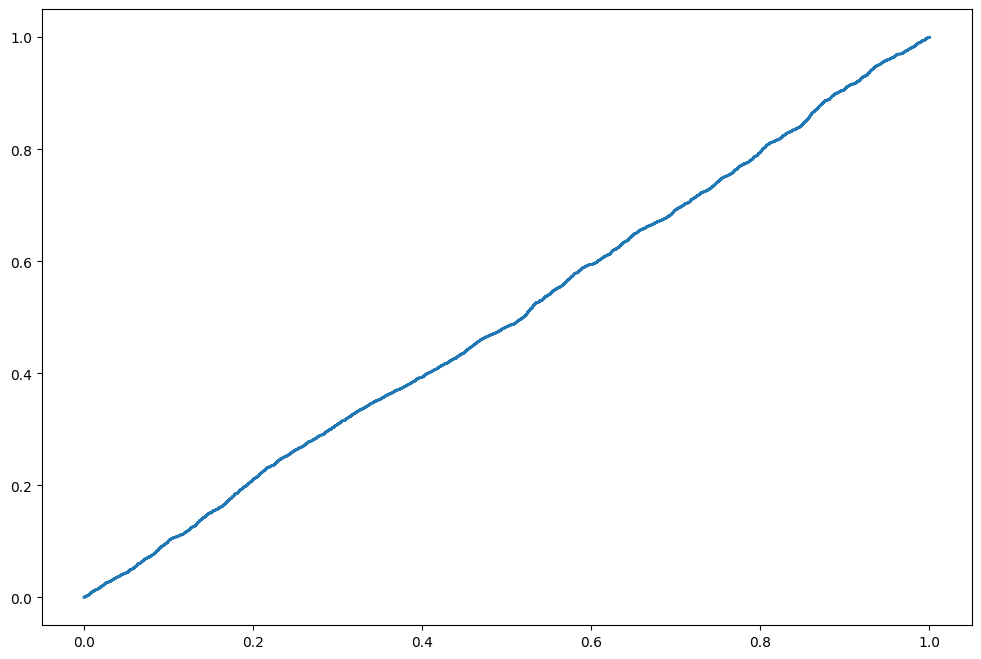

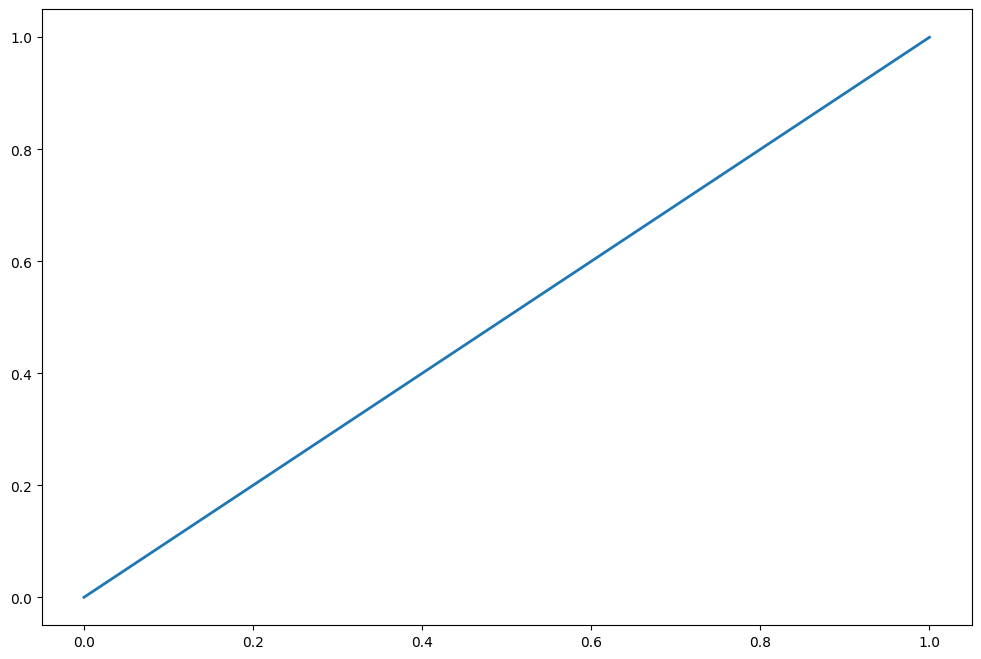

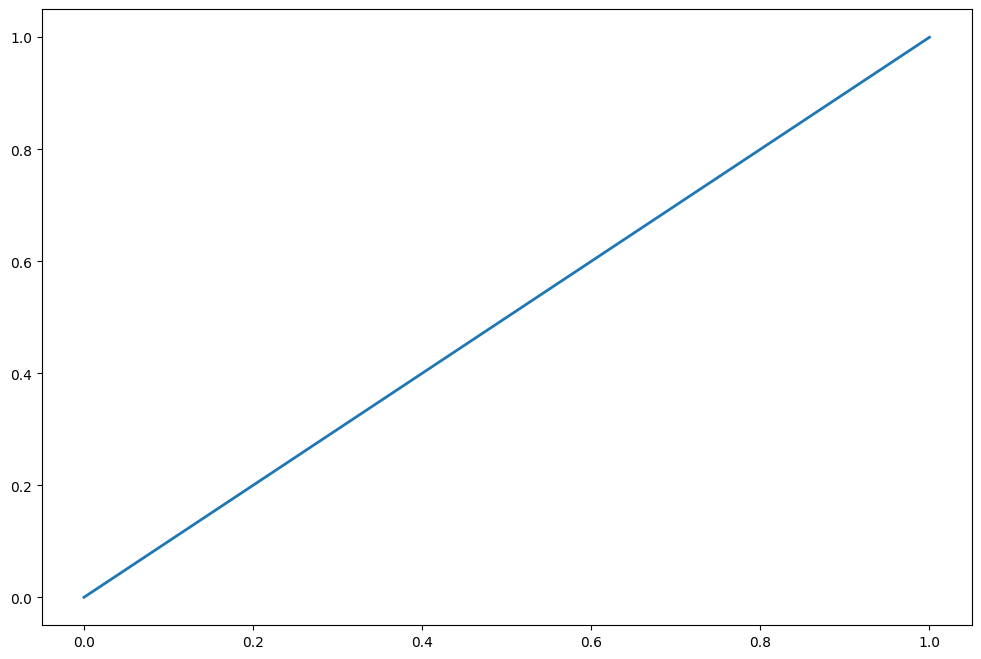

In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc

# Dictionary to store the best models and their performance
best_models = {}

# Re-apply GridSearchCV to obtain the best models
for model_name, (classifier, param_grid) in classifiers.items():
    print(f"\nEvaluating {model_name} on Test Data...")

    # Define GridSearchCV with classifier, parameter grid, and scoring metric
    grid_search = GridSearchCV(classifier, param_grid, scoring='roc_auc', cv=3, n_jobs=-1)

    # Fit GridSearchCV on ADASYN resampled data
    grid_search.fit(X_resampled, y_resampled)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Predict on test data
    y_test_prob = best_model.predict_proba(X_test)[:, 1]  # Predict probabilities for the positive class

    # Compute ROC curve and ROC AUC score
    fpr, tpr, _ = roc_curve(y_test, y_test_prob)  # Assuming y_test is your test labels
    roc_auc = auc(fpr, tpr)

    # Store the best model and its ROC AUC score
    best_models[model_name] = {'model': best_model, 'roc_auc': roc_auc}

    # Print classification report
    y_test_pred = best_model.predict(X_test)
    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(y_test, y_test_pred))

    print(f"ROC-AUC Score: {roc_auc:.4f}")

    # Plot ROC curve
    plt.figure(figsize=(12, 8))
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (area = {roc_auc:.2f})')


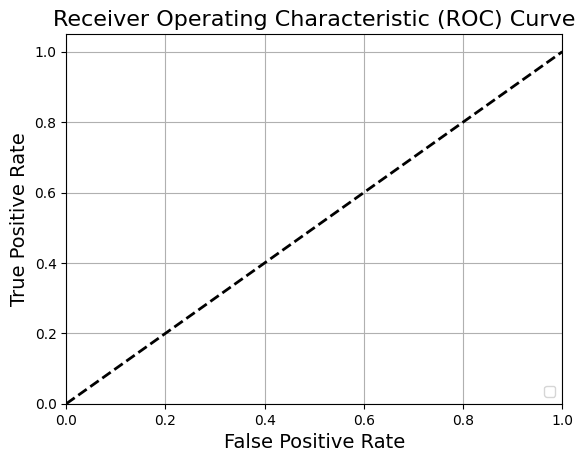

In [ ]:
# Plot ROC curves for all best models
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()